In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('SalaryData_Test.csv')
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
df_test.shape

(15060, 14)

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


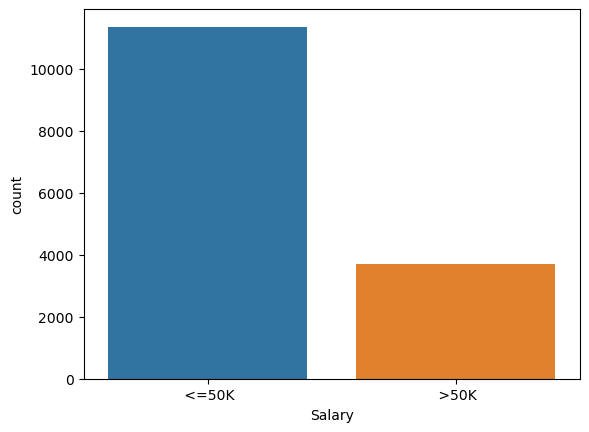

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [7]:
sns.countplot(x='Salary',data= df_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
df_test['Salary'].value_counts()

In [8]:
list[df_test]
df_test.shape

(15060, 14)

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [10]:
for i in range(0,14):
    df_test.iloc[:,i] = LE.fit_transform(df_test.iloc[:,i])

In [11]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [12]:
Y = df_test['Salary']
X = df_test.iloc[:,:13]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=50)

In [14]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear',C=2)

In [15]:
clf1.fit(X_train, Y_train)
y_pred_train = clf1.predict(X_train)
y_pred_test = clf1.predict(X_test)

In [16]:
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(Y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, y_pred_test).round(2))

Training Accuracy : 0.8
Testing Accuracy: 0.81


In [17]:
clf2 = SVC(kernel='poly',degree=2)

In [18]:
clf2.fit(X_train, Y_train)
y_pred_train = clf2.predict(X_train)
y_pred_test  = clf2.predict(X_test)

In [19]:
print("Training Accuracy :",metrics.accuracy_score(Y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, y_pred_test).round(2))

Training Accuracy : 0.81
Testing Accuracy: 0.81


In [20]:
clf3 = SVC(kernel='rbf',gamma = 5.5)

In [21]:
clf3.fit(X_train, Y_train)
y_pred_train = clf3.predict(X_train)
y_pred_test = clf3.predict(X_test)

In [22]:
print("Training Accuracy :",metrics.accuracy_score(Y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, y_pred_test).round(2))

Training Accuracy : 0.99
Testing Accuracy: 0.77
